## How to use the Sharpe ratio for risk-adjusted returns

In today’s issue, I’m going to show you how to use the most popular performance metric in investing: the Sharpe ratio.

The Sharpe ratio tells you the “risk-adjusted” return of an investment. In other words, “how much return do you get for every unit of risk you take.” It’s a great way to compare strategies because it normalizes their returns by risk.

If you’re investing or trading, you might want to consider the Sharpe ratio as one of your performance metrics.

## Without considering the Sharpe ratio, you miss important information about the performance.

Here’s an example:

Stock A returned 20%
Stock B returned 25%
Which is the better investment?

You’re going to say Stock B because it returned more. What if I told you Stock A has 10% volatility and Stock B has 70% volatility? Then it’s not so clear. The Sharpe ratio takes this into account. A Sharpe ratio over 1 is generally considered “good.”

By the end of this newsletter, you’ll know:

How to get stock price data
How to compute the Sharpe ratio
How to compare two investment options
All using Python.

In [4]:
# Get the data
import yfinance as yf
import numpy as np

data = yf.download(["AAPL", "SPY"], start="2017-01-01", end="2022-06-30")
closes = data['Adj Close']
spy_returns = closes.SPY.pct_change().dropna()
aapl_returns = closes.AAPL.pct_change().dropna()

[*********************100%***********************]  2 of 2 completed


With yfinance, you can download data for more than one stock at a time. Grab data for both SPY and AAPL. With yfinance, you can download data for more than one stock at a time. Grab data for both SPY and AAPL.

This gives you a MultiIndex DataFrame. There’s one extra line of code we need to build the returns.

closes = data['Adj Close']
spy_returns = closes.SPY.pct_change().dropna()
aapl_returns = closes.AAPL.pct_change().dropna()

In [5]:
# Compute the Sharpe ratio

def sharpe_ratio(returns, adjustment_factor=0.0):
    """
    Determines the Sharpe ratio of a strategy.

    Parameters
    ----------
    returns : pd.Series or np.ndarray
        Daily returns of the strategy, noncumulative.
    adjustment_factor : int, float
        Constant daily benchmark return throughout the period.

    Returns
    -------
    sharpe_ratio : float

    Note
    -----
    See https://en.wikipedia.org/wiki/Sharpe_ratio for more details.
    """
    returns_risk_adj = returns - adjustment_factor
    return (
        returns_risk_adj.mean() / returns_risk_adj.std()
    ) * np.sqrt(252)

The function takes a series of daily returns and subtracts an adjustment factor. In the original work by William Sharpe, the adjustment factor was the risk-free rate. (Since the risk-free rate has been near 0 for almost a decade, I don’t consider it in the analysis.)

Then, the function divides the mean return by the standard deviation of return. Since the function accepts daily returns, you can annualize it by multiplying by the square root of the number of trading days in the year.

In [7]:
# Compare investment options
# sharpe ratio for SPY
print(sharpe_ratio(spy_returns))

# sharpe ratio for AAPL
print(sharpe_ratio(aapl_returns))

0.6773011874814024
1.115688061390821


The Sharpe ratio for AAPL is higher than for SPY. That means you got more return for every unit of risk and might be considered “better.”

It’s always useful to look at performance metrics through time because they are never static. It’s easy with Python.



<AxesSubplot:xlabel='Date'>

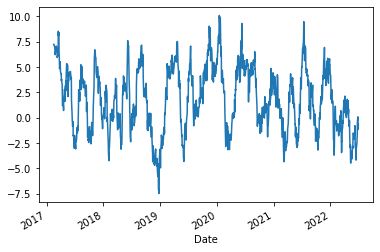

In [8]:
aapl_returns.rolling(30).apply(sharpe_ratio).plot()

<AxesSubplot:>

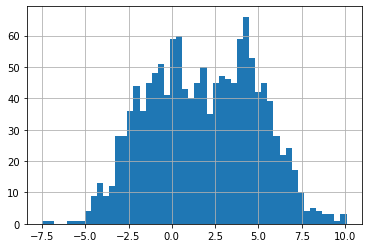

In [9]:
# Get the distribution of the sharp ratio
aapl_returns.rolling(30).apply(sharpe_ratio).hist(bins=50)

<AxesSubplot:>

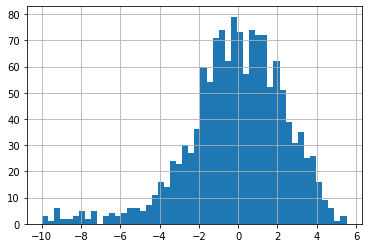

In [10]:
# Subtract the SPY Sharpe ratio from the AAPL Sharpe ratio and plot the result as a histogram.

(
    aapl_returns.rolling(30).apply(sharpe_ratio)
    - spy_returns.rolling(30).apply(sharpe_ratio)
).hist(bins=50)